## Predicting Diabetes using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has Diabetes on their medical attributes.

We are going to take the following approach: 
1. Problem definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling
6. Experimentation 

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patients, can we predict whether or not they have Diabetes? 

## 2. Data

## 3. Evaluation 

> If we can reach 95%  accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project 

## 4. Features 

This is where you'll get different information about each of the features in your data.

Create data dictonary 
 * age
 * gender
 * body mass index (BMI)
 * hypertension 
 * heart disease
 * smoking history
 * HbA1c level
 * blood glucose level


## Preparing the tools 

We're going to use pandas , Matplotlib and Numpy for data analysis and manipulation  

In [2]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline      
#we want our plots to appear inside the notebook

# # Models from scikit learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data 

In [3]:
df = pd.read_csv("data/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

## Data Exploration 

In [5]:
# Let's find out how many of each class there 
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

<Axes: xlabel='diabetes'>

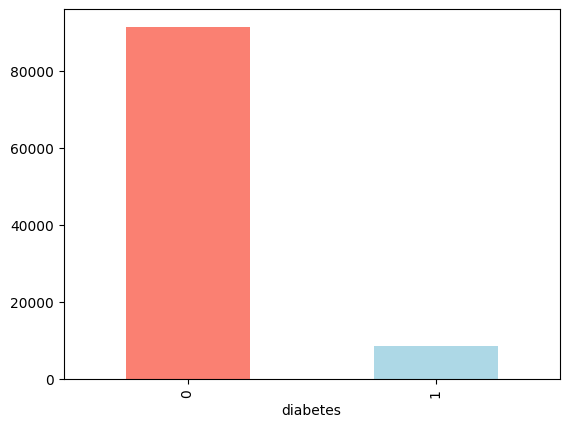

In [6]:
# Let's make a bar graph using the above data 
df["diabetes"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"])

In [7]:
# Info of all the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# Are there any missing value 
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Diabetes frequency according to gender 

In [10]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [11]:
# Compare 'Diabetes' column with the 'gender' column 
pd.crosstab(df.diabetes, df.gender)

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

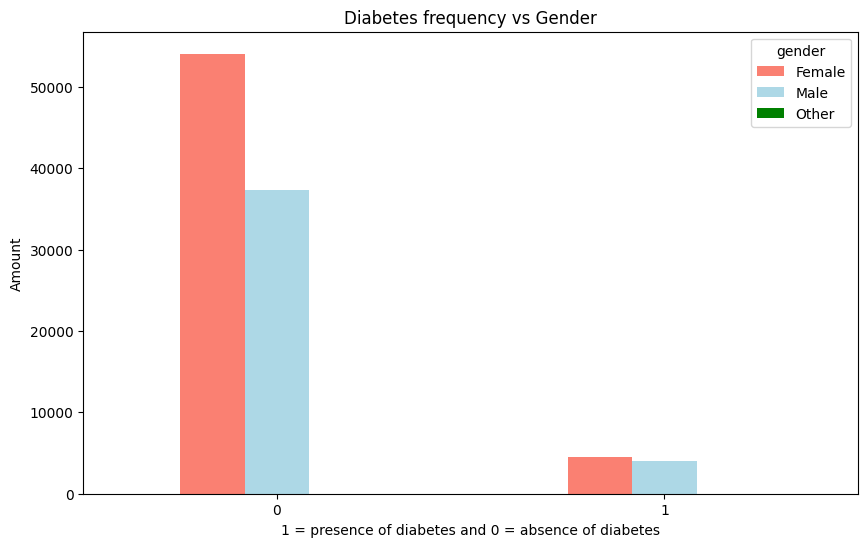

In [12]:
# Let's create a plot of crosstab 
pd.crosstab(df.diabetes, df.gender).plot(kind = "bar",
                                         figsize = (10, 6),
                                         color = ["salmon", "lightblue", "green"])

plt.title("Diabetes frequency vs Gender")
plt.xlabel("1 = presence of diabetes and 0 = absence of diabetes")
plt.ylabel("Amount")
plt.xticks(rotation = 0)

In [13]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Age vs BMI rate for Diabetes

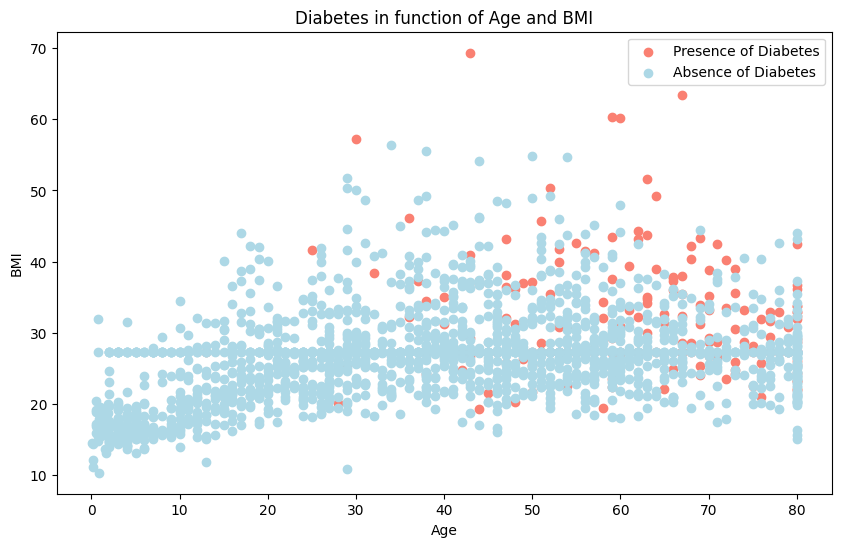

In [14]:
# Create another figure 
plt.figure(figsize = (10, 6))

x = 2000  ## You can go upto 100000

# Scatter with positive example 
plt.scatter(df.age[:x][df.diabetes == 1],
            df.bmi[:x][df.diabetes == 1],
            c = "salmon")

# Scatter with negative example 
plt.scatter(df.age[:x][df.diabetes == 0],
            df.bmi[:x][df.diabetes == 0],
            c = "lightblue")

# Add some helpful info 
plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["Presence of Diabetes", "Absence of Diabetes"])

## Convert string to catagories 

One way we can turn all of our data into numbers is by converting them into pandas catagories

In [15]:
# make a copy 
df_tmp = df.copy()

In [16]:
df_tmp.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

gender
smoking_history


In [18]:
# Convert the columns in to category 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.codes

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int8   
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int8   
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), int8(2)
memory usage: 5.5 MB


In [20]:
df_tmp

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [21]:
# Make a correlation matrix 
df_tmp.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


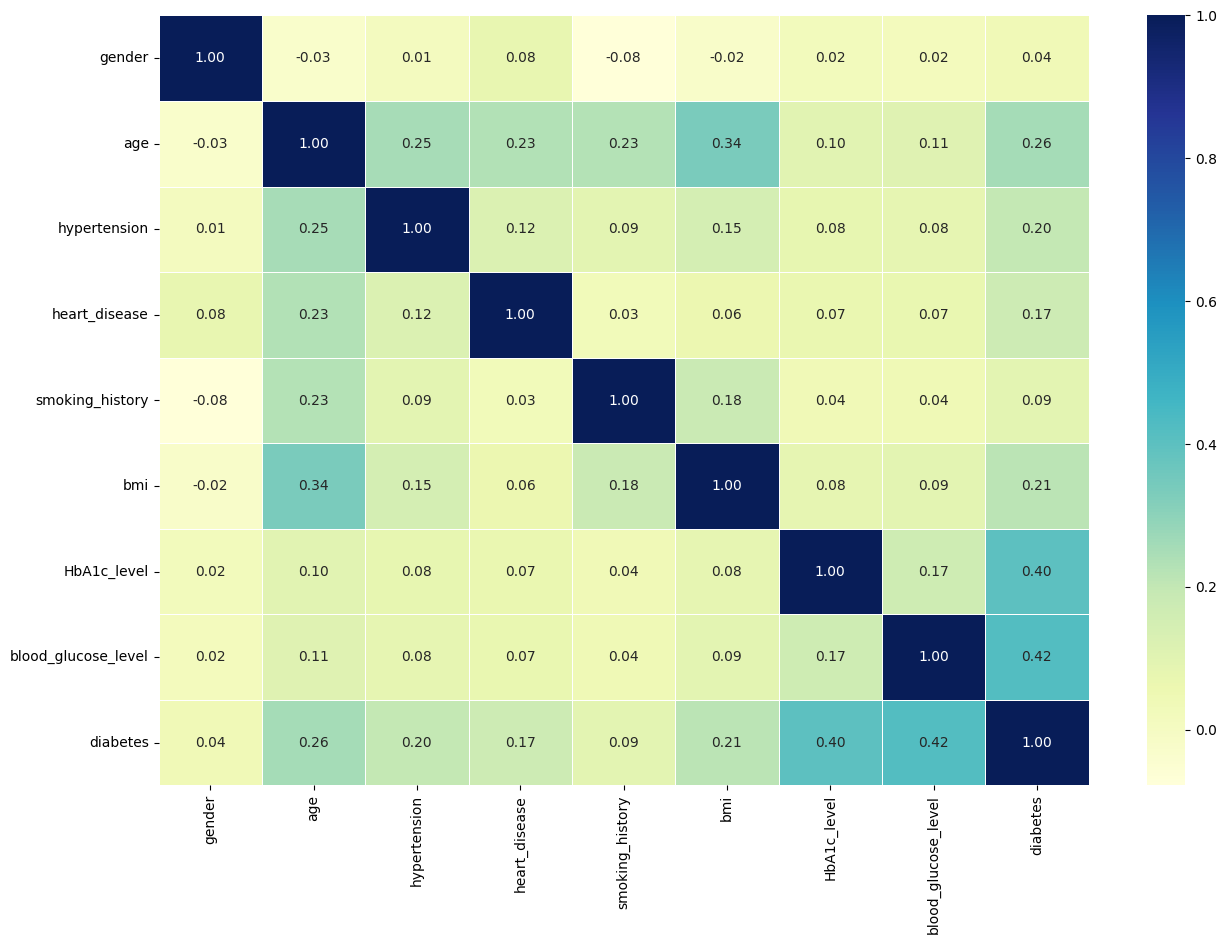

In [22]:
# Let's make our correlation matrix a little prettier 
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")


## Modeling 

In [23]:
# Split data into X and Y
x = df_tmp.drop("diabetes", axis = 1)
y = df_tmp["diabetes"]

In [24]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [25]:
y, len(y)

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 99995    0
 99996    0
 99997    0
 99998    0
 99999    0
 Name: diabetes, Length: 100000, dtype: int64,
 100000)

In [26]:
# Split data into train and test
np.random.seed(42)

# Split into train and test set 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2)

In [27]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,4,24.60,5.7,145
44966,0,38.0,0,0,2,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,1,22.11,4.5,85
...,...,...,...,...,...,...,...,...
6265,1,49.0,0,0,4,32.98,5.7,80
54886,0,15.0,0,0,4,28.10,5.0,159
76820,1,42.0,0,0,4,26.14,5.8,85
860,0,37.0,0,0,4,24.96,6.2,158


In [28]:
y_train

75220    0
48955    1
44966    0
13568    0
92727    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: diabetes, Length: 80000, dtype: int64

In [29]:
x_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,13.0,0,0,0,20.82,5.8,126
80184,0,3.0,0,0,0,21.00,5.0,145
19864,1,63.0,0,0,3,25.32,3.5,200
76699,0,2.0,0,0,4,17.43,6.1,126
92991,0,33.0,0,0,5,40.08,6.2,200
...,...,...,...,...,...,...,...,...
32595,0,44.0,0,0,5,21.95,6.0,159
29313,1,61.0,1,0,3,41.98,3.5,90
37862,0,49.0,0,0,4,26.51,4.8,100
53421,1,73.0,0,1,0,27.32,6.6,100


In [30]:
y_test

75721    0
80184    0
19864    0
76699    0
92991    1
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: diabetes, Length: 20000, dtype: int64

Now we've got our data split into training and test sets, its time to build a machine learning model.

We'll train it (find a patterns) on the training set.

and we'll test it (use the paterns) on the test set.

 We're going to try 3 different machine learning models: 
1. Logistic Reression 
2. K-Nearest Neighbours classifier 
3. Random Forest Classifier 

In [31]:
# Put the models in a distionary 
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function of fit and score model.
def fit_and_score (models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of difference scikit_Learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no lables)
    y_train: training labels 
    y_test : test labels 
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictonary to keep model score 
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores

In [32]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

{'Logistic Regression': 0.9499, 'KNN': 0.9525, 'Random Forest': 0.97065}

## MOdel Comparison

In [33]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.9499,0.9525,0.97065


<Axes: >

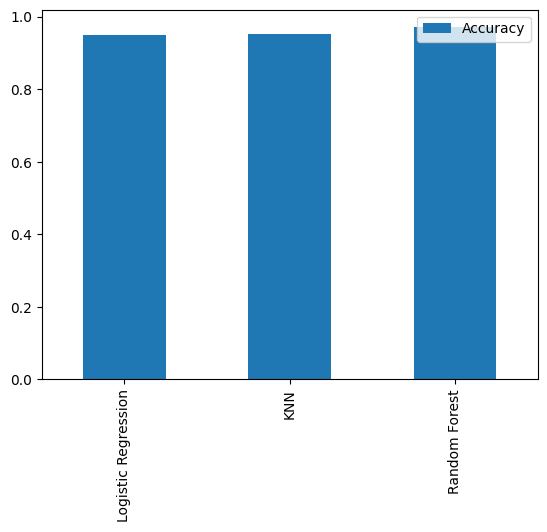

In [34]:
# Let's make a plot 
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first prediction aren't always what we should based our next steps off. What should we do ?

Let's look at the following

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross_validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC Curve
10. Area under the curve (AUC)

## 1. Hyperparameter Tuning method 

* By Hand
* RandomizedSearchCV
* GridSearchCV

## Hyperparameter tuning (By hand) to KNN

In [35]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range (1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the algorithm 
    knn.fit(x_train, y_train)

    # Update the training scores list 
    train_scores.append(knn.score(x_train, y_train))

    # Update the test scores list 
    test_scores.append(knn.score(x_test, y_test))


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

Maximum KNN score on the test date: 95.31 %


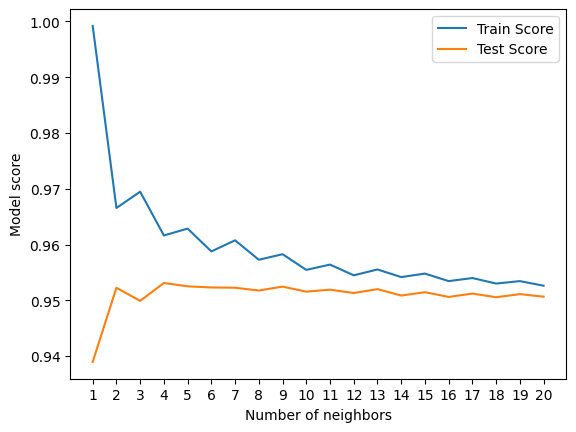

In [36]:
# Lets plot the output of the scores and compare the test & train scpore and 
# find out the neighbors at the max test score
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test date:{max(test_scores)*100: .2f} %")

Before Hyperparameter tuning the KNN score was 0.9525 and after the hyperparameter tuning the KNN score is 0.9531. No significant change.

## Hyperparameter tuning (Randomized Search CV) for Logistic Regression ()

In [37]:
# Create a Hyperparameter grid for LogisticRegression 

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Tune LOgisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv= 5,
                                n_iter= 20,
                                verbose= True)

# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [39]:
rs_log_reg.score(x_test, y_test)

0.95875

Before tuning the Logistic Regression score was 0.9499 and after the hyperparameter
tuning the score is 0.95875

## Hyperparameter tuning (Randomized Search CV) for Random Forest Classifier()

In [40]:
# Create huperpamater grid for RandomForestClassifier 
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

# set up random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv = 5,
                           n_iter= 20,
                           verbose= True)

# Fit random hyperparameter search model for RandomForestClassifier 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [42]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.9723

Before tuning the RandomForestClassifier score was 0.97065 and after the hyperparameter
tuning the score is 0.9723

## Hyperparameter tuning (Grid Search CV) for Logistic Regression()

In [43]:
# Different hyperparameter for our LOgisticRegression model 
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv = 5,
                          verbose= True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
# Check the best hyperparameter 
gs_log_reg.best_params_

{'C': 2807.2162039411755, 'solver': 'liblinear'}

In [45]:
# Evaluate the grid search LogisticRegression model 
gs_log_reg.score(x_test, y_test)

0.9587

The results were same as before.

## Final scores:
* LogisticRegression = 0.9587
* RandomForestClassifier = 0.9723
* KNeighborsClassifier = 0.9531

Since our RandomForestClassifier model provides the best scores so far, we will try to evaluate 'Confusion Matrix', 'Classificstion Report' etc.

In [48]:
# Make prediction with tuned model 
y_preds = rs_rf.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
y_test

75721    0
80184    0
19864    0
76699    0
92991    1
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: diabetes, Length: 20000, dtype: int64

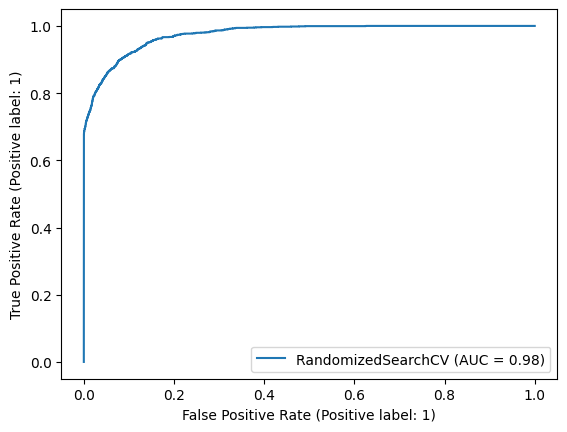

In [50]:
# PLot ROC Curve and calculate AUC metric
plot_roc_curve(rs_rf, x_test, y_test)

In [51]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[18289     3]
 [  551  1157]]


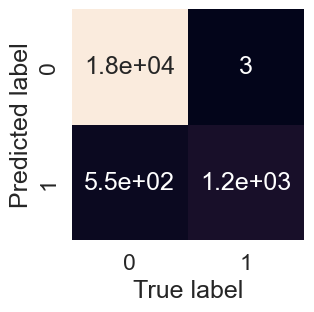

In [54]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel ("True label")
    plt.ylabel ("Predicted label")

    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [55]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

